In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [ ]:
#We can obtain predicted values of any stock listed company with changing the ticker symbol.

In [84]:
#setting the start date & end date
start= '2009-12-31'
end = '2019-12-31'

#Taking data from yf the data package from python library
df = yf.download('AAPL',start,end)

#displaying starting readings
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.415359,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422666,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410792,477131200
...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.557083,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.623222,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,71.004585,93121200


In [85]:
#displaying ending few readings
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.557083,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.623222,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,71.004585,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.977631,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.398911,144114400


In [86]:
#reset_index is used to initilize editing to the table
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.415359,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422666,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410792,477131200


In [87]:
#dropping/deleting Date & Adj Close columns
df = df.drop(['Date' , 'Adj Close'],axis= 1)
df.head()

,Open,High,Low,Close,Volume
0,7.611786,7.619643,7.520000,7.526071,352410800
1,7.622500,7.660714,7.585000,7.643214,493729600
2,7.664286,7.699643,7.616071,7.656429,601904800
3,7.656429,7.686786,7.526786,7.534643,552160000
4,7.562500,7.571429,7.466071,7.520714,477131200


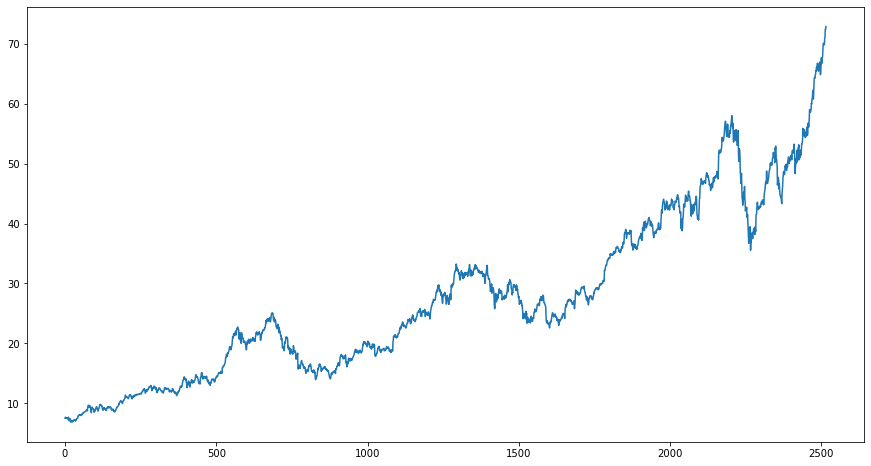

In [118]:
#Ploting the above readings in a line graph
plt.figure(figsize=(15,8))
plt.plot(df.Close)

In [89]:
#All readings & it's count
df

,Open,High,Low,Close,Volume
0,7.611786,7.619643,7.520000,7.526071,352410800
1,7.622500,7.660714,7.585000,7.643214,493729600
2,7.664286,7.699643,7.616071,7.656429,601904800
3,7.656429,7.686786,7.526786,7.534643,552160000
4,7.562500,7.571429,7.466071,7.520714,477131200
...,...,...,...,...,...
2511,70.132500,71.062500,70.092499,71.000000,98572000
2512,71.172501,71.222504,70.730003,71.067497,48478800
2513,71.205002,72.495003,71.175003,72.477501,93121200
2514,72.779999,73.492500,72.029999,72.449997,146266000


In [90]:
# ma is for moving average 
# It will calculate the moving average for first 100 readings
#First 100 values will be null values
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.201075
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
Name: Close, Length: 2516, dtype: float64

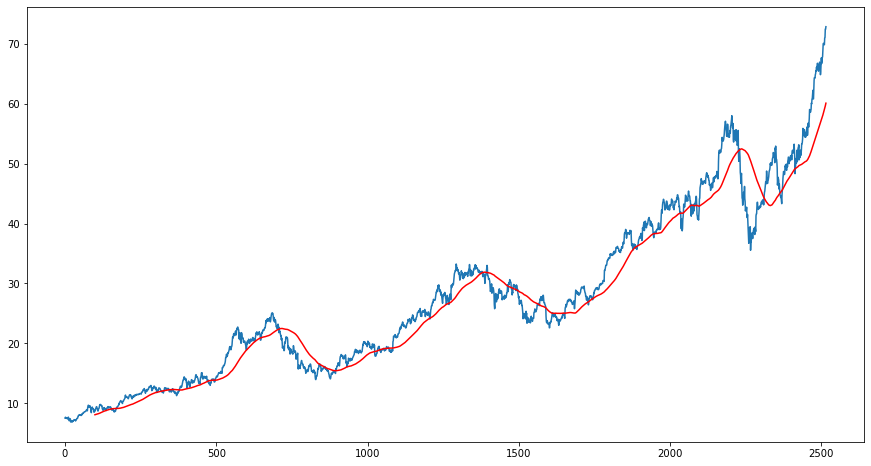

In [119]:
# Setting the dimentions of the graph 
plt.figure(figsize =(15,8))

#Plotting Close & ma100 in the graph
plt.plot(df.Close)

#Plotting ma100 with red colour line
plt.plot(ma100, 'r')

In [92]:
# It will calculate the moving average for first 200 readings
#First 200 values will be null values
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    54.132313
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
Name: Close, Length: 2516, dtype: float64

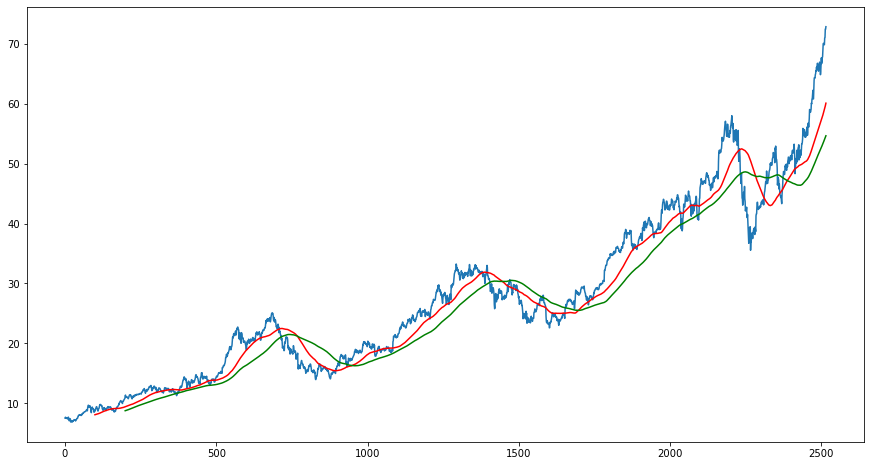

In [120]:
plt.figure(figsize =(15,8))

#Plotting Close, ma100 & ma200 in the graph
plt.plot(df.Close)

#Plotting ma100 with red colour line & ma200 with green line
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [94]:
#This shows us that there are 2516 rows & 5 columns in our data set
df.shape

(2516, 5)

In [95]:
#Splitting data into training & testing

#Creating DataFrame for Training & Testing 
#Staring with 0 index we will take 70% of the value for Training
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

#Printing the shapes of Testing & Training
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [96]:
#Starting few readings of the data_training set
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [97]:
#Starting few readings of the data_testing set
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [98]:
#from the sklearn library we import a specific library i.e. MinMaxScaler for scaling down the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [99]:
#Converting data_training into an array
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [100]:
x_train = []
y_train = []

#x_train will start with the 0th index  
#y_train will start from i
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [101]:
#ML model
#Keras is a minimalist Python library for deep learning
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [104]:
# Dropout works by randomly setting the outgoing edges of hidden units
#Dropout is a technique used to prevent a model from overfitting.
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

#Connects all the above layers
model.add(Dense(units = 1))

In [105]:
#Defines the summary of the data
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_17 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_18 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_18 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_19 (LSTM)              (None, 120)              

In [36]:
#Compiling the ML model with adam optimizer with loss as mean_squared_error
model.compile(optimizer ='adam', loss= 'mean_squared_error')

#epoch is an instant of time or a date selected as a point of reference
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 19s 211ms/step - loss: 0.0512
Epoch 2/50
52/52 [==============================] - 11s 207ms/step - loss: 0.0118
Epoch 3/50
52/52 [==============================] - 11s 203ms/step - loss: 0.0110
Epoch 4/50
52/52 [==============================] - 11s 210ms/step - loss: 0.0083
Epoch 5/50
52/52 [==============================] - 12s 240ms/step - loss: 0.0085
Epoch 6/50
52/52 [==============================] - 12s 234ms/step - loss: 0.0074
Epoch 7/50
52/52 [==============================] - 11s 221ms/step - loss: 0.0085
Epoch 8/50
52/52 [==============================] - 12s 224ms/step - loss: 0.0081
Epoch 9/50
52/52 [==============================] - 11s 216ms/step - loss: 0.0071
Epoch 10/50
52/52 [==============================] - 12s 226ms/step - loss: 0.0073
Epoch 11/50
52/52 [==============================] - 12s 224ms/step - loss: 0.0065
Epoch 12/50
52/52 [==============================] - 14s 271ms/step - loss: 0.0065
Epoch 13/50
5

In [38]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [106]:
#Fetching past 100 days from data_training set
past_100_days = data_training.tail(100)

In [107]:
#appending past 100 days to data_testing
final_df = past_100_days.append(data_testing, ignore_index=True)

In [41]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [108]:
#Scaling down final_df
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [109]:
#Shape of input_data
input_data.shape

(855, 1)

In [46]:
#Declaring the x_test & y_test & appending it to input_data
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [47]:
#Converting to numpy array
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test)
print(y_test)

[[[0.02781467]
  [0.03015022]
  [0.02585064]
  ...
  [0.07107596]
  [0.07500401]
  [0.07234994]]

 [[0.03015022]
  [0.02585064]
  [0.02547908]
  ...
  [0.07500401]
  [0.07234994]
  [0.0721907 ]]

 [[0.02585064]
  [0.02547908]
  [0.02680611]
  ...
  [0.07234994]
  [0.0721907 ]
  [0.06736028]]

 ...

 [[0.47884709]
  [0.49827489]
  [0.50910346]
  ...
  [0.93587777]
  [0.96008286]
  [0.961516  ]]

 [[0.49827489]
  [0.50910346]
  [0.53240618]
  ...
  [0.96008286]
  [0.961516  ]
  [0.99145398]]

 [[0.50910346]
  [0.53240618]
  [0.51945439]
  ...
  [0.961516  ]
  [0.99145398]
  [0.99087   ]]]
[0.0721907  0.06736028 0.06911197 0.06842189 0.07155371 0.07845431
 0.08418707 0.08482406 0.08822126 0.08556719 0.08445249 0.0895483
 0.0894952  0.0883805  0.0895483  0.08997296 0.08938906 0.09952758
 0.0998461  0.09989915 0.09820055 0.09671427 0.1359945  0.1348267
 0.1377462  0.144169   0.15075112 0.15345824 0.15547536 0.1538829
 0.16009341 0.16927655 0.17187748 0.17102824 0.17299223 0.17819418
 0.1803

In [49]:
#Making predictions
y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 72ms/step


In [50]:
#Shape of y_predicted
y_predicted.shape

(755, 1)

In [51]:
#Displaying the array of y_test
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [52]:
y_predicted

array([[0.13892594],
       [0.1392467 ],
       [0.13955234],
       [0.13981602],
       [0.14002001],
       [0.14015377],
       [0.14022104],
       [0.14024156],
       [0.14024696],
       [0.14026275],
       [0.14031108],
       [0.1404014 ],
       [0.14053908],
       [0.14073181],
       [0.14098185],
       [0.14128132],
       [0.14162387],
       [0.14199485],
       [0.14236443],
       [0.14274235],
       [0.14313334],
       [0.14353861],
       [0.14395002],
       [0.14438291],
       [0.1449084 ],
       [0.14559743],
       [0.14650938],
       [0.14770359],
       [0.14922288],
       [0.15108627],
       [0.15328449],
       [0.15579286],
       [0.15859157],
       [0.16165477],
       [0.16493638],
       [0.16821186],
       [0.17147219],
       [0.17474928],
       [0.17804217],
       [0.18133272],
       [0.18453006],
       [0.18762937],
       [0.1906288 ],
       [0.19351149],
       [0.19628735],
       [0.19896479],
       [0.20153585],
       [0.203

In [53]:
#Finding the factor by which we scaled down the data
scaler.scale_

array([0.02123255])

In [55]:
#Dividing y_test & y_predicted with the scale factor
scale_factor = 1/ 0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

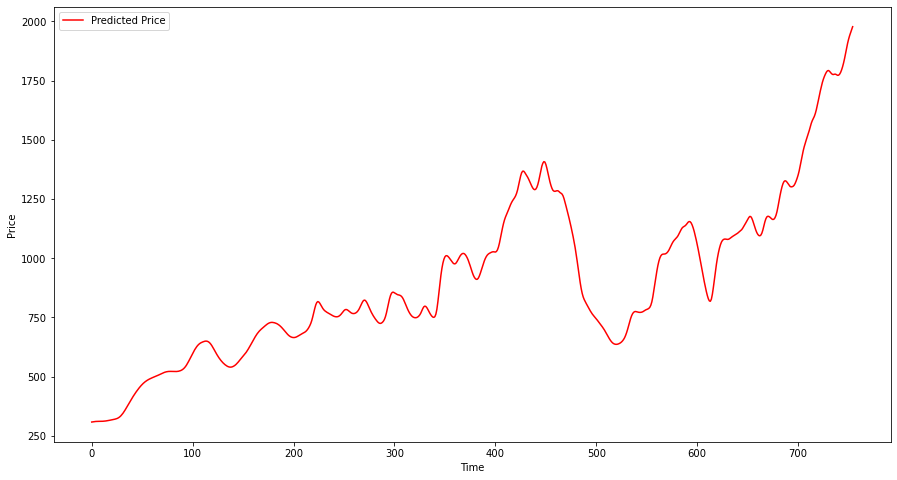

In [75]:
plt.figure(figsize=(15,8))
#Plotting y_predicted with red colour line 
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

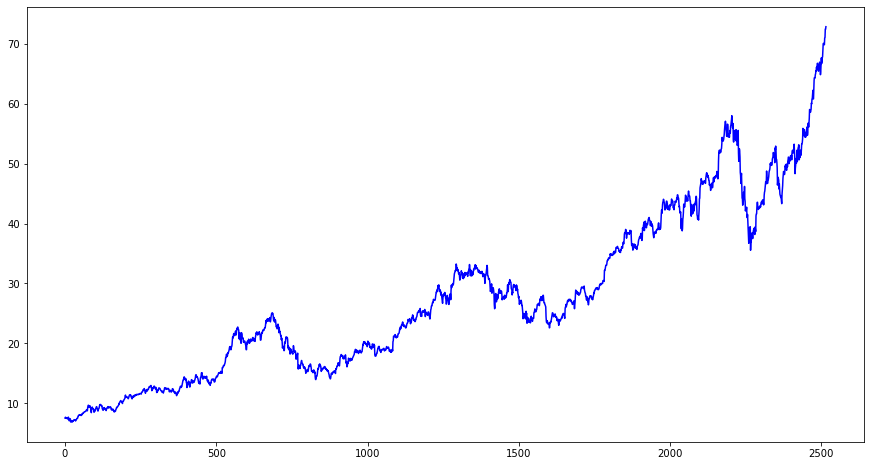

In [76]:
plt.figure(figsize=(15,8))
#Plotting y_predicted with blue colour line 
plt.plot(df.Close, 'b' , label= 'Original Price')

In [122]:
#This show the difference between the values of the original price & the predicted price
df['price_diff'] = df['Close'].diff()
df

,Open,High,Low,Close,Volume,price_diff
0,7.611786,7.619643,7.520000,7.526071,352410800,NaN
1,7.622500,7.660714,7.585000,7.643214,493729600,0.117143
2,7.664286,7.699643,7.616071,7.656429,601904800,0.013215
3,7.656429,7.686786,7.526786,7.534643,552160000,-0.121786
4,7.562500,7.571429,7.466071,7.520714,477131200,-0.013929
...,...,...,...,...,...,...
2511,70.132500,71.062500,70.092499,71.000000,98572000,1.139999
2512,71.172501,71.222504,70.730003,71.067497,48478800,0.067497
2513,71.205002,72.495003,71.175003,72.477501,93121200,1.410004
2514,72.779999,73.492500,72.029999,72.449997,146266000,-0.027504
